In [1]:
import warnings
import pandas as pd
import numpy as np 
import json 
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.linear_model import LogisticRegression as lr
from sklearn.naive_bayes import GaussianNB as gnb 
from sklearn.metrics import f1_score
from sklearn import linear_model as lm
from sklearn import neighbors 
from sklearn import neural_network
from sklearn import gaussian_process as gp
from sklearn.metrics import confusion_matrix 
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
### Storing data of each embedding 
class Sentence:
    def __init__(self, sent):
        self.name = sent.name 
        self.toi = sent[0]
        self.con = (int)(sent[1] == "Congruent")
        self.val = sent[2] 
        self.sur = sent[3] 
        self.embedding = sent[4]

In [9]:
### Storing atrributes of each classifier 
class Classifier:
    def __init__(self, model, name, toi_report = "", con_report = "", report_80 = "", con_report_80 = "", bio_report = "", conn_report="", inconn_report=""):
        self.model = model 
        self.name = name
        self.toi_report = toi_report
        self.con_report = con_report 
        self.report_80 = report_80 
        self.con_report_80 = con_report_80
        self.bio_report = bio_report 
        self.conn_report = con_report
        self.incon_report = inconn_report


In [4]:
### Reading in the data 
filename = ""
sentences = []
f = open(filename)
dat = pd.read_json(f)
for i in range(1, len(dat.columns)+1):
    sentences.append(Sentence(dat[i]))

In [5]:
### Splitting data into tesing and training sets for TOI and Congruence
train, test = train_test_split(sentences, test_size=0.33, random_state=42)
train_x = [x.embedding for x in train]
train_y_toi = [y.toi for y in train]
train_y_con = [y.con for y in train]
test_x = [x.embedding for x in test]
test_y_toi = [x.toi for x in test]
test_y_con = [y.con for y in test]

In [10]:
### 10 classifiers 
classifiers = [] 

### Linear SVM
linearSVM = svm.SVC(kernel='linear')
classifiers.append(Classifier(linearSVM, "Linear SVM"))

### RBF SVM
rbfSVM = svm.SVC(kernel='rbf')
classifiers.append(Classifier(rbfSVM, "RBF SVM"))

### Stochastic Gradient Descent 
sgd = lm.SGDClassifier()
classifiers.append(Classifier(sgd, "Stochastic Gradient Descent"))

### Decision Tree
dt = dtc() 
classifiers.append(Classifier(dt, "Decision Tree"))

### Gaussian Naive Bayes' 
gnb = gnb() 
classifiers.append(Classifier(gnb, "Guassian Naive Bayes"))

### Logistic Regression 
lr = lr() 
classifiers.append(Classifier(lr, "Logistic Regression"))

### k Nearest Neighbors
knn = neighbors.KNeighborsClassifier()
classifiers.append(Classifier(knn, "k Nearest Neighbors"))

### Multi-Layer Perceptron
mlp = neural_network.MLPClassifier(hidden_layer_sizes=(200,))
classifiers.append(Classifier(mlp, "Multi-Layer Perceptron"))

### Ridge Classifier 
rc = lm.RidgeClassifier()
classifiers.append(Classifier(rc, "Ridge Classifier"))

### Gaussian Process Classifier
gpc = gp.GaussianProcessClassifier()
classifiers.append(Classifier(gpc, "Gaussian Process"))

In [11]:
### TOI Accuracy Metrics
toi_predictions = []
for clf in classifiers:
    clf.model.fit(train_x, train_y_toi)
    predicted_labels = clf.model.predict(test_x)
    toi_predictions.append(predicted_labels)
    clf.toi_report = classification_report(test_y_toi, predicted_labels, target_names=["Biographical", "Actions", "Reflection", "Intentions"])

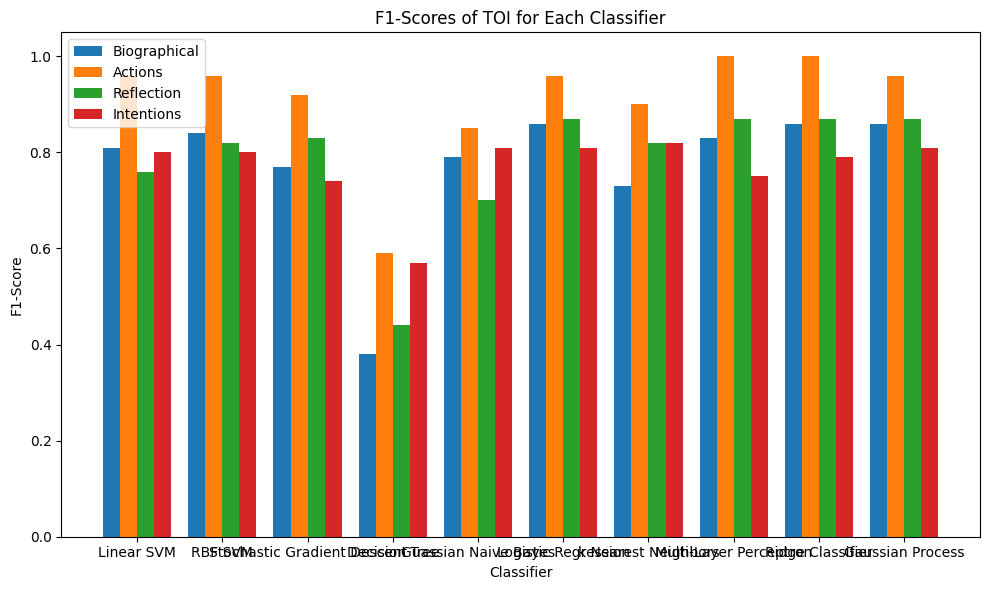

In [12]:
import re
import matplotlib.pyplot as plt
import numpy as np

# Simulated list of report strings for two classifiers
reports = []

for classifier in classifiers:
    reports.append(classifier.toi_report)

# TOI labels (ensure these match your reports)
toi_labels = ["Biographical", "Actions", "Reflection", "Intentions"]

# Initialize a structure to hold F1-scores for each TOI label for each classifier
f1_scores = {label: [] for label in toi_labels}

# Extract F1-scores for each TOI label for each classifier
for report in reports:
    for label in toi_labels:
        pattern = fr"{label}\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+)"
        match = re.search(pattern, report)
        if match:
            f1_score = float(match.group(1))
            f1_scores[label].append(f1_score)

# Plotting
n_classifiers = len(reports)
index = np.arange(n_classifiers)
bar_width = 0.2

plt.figure(figsize=(10, 6))

for i, label in enumerate(toi_labels):
    plt.bar(index + i * bar_width, f1_scores[label], bar_width, label=label)

plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.title('F1-Scores of TOI for Each Classifier')
plt.xticks(index + bar_width * (len(toi_labels) - 1) / 2, [classifiers[i].name for i in range(n_classifiers)])
plt.legend()

plt.tight_layout()
plt.show()


This graph represents the f-1 scores of the 10 classifiers used with reference to their respective TOI predictions. Accross all classifiers, the "Actions" TOI is most accurately predicted, whereas the accuracies of the other 3 labels flutuate. Stochastic Gradient Descent seems to have a marginally higher overall accuracy, and Decision Trees have the lowest overall accuracy by a large factor. 

In [13]:
### Congruence Accuracy Metrics
con_predictions = []
for clf in classifiers:
    clf.model.fit(train_x, train_y_con)
    predicted_labels = clf.model.predict(test_x)
    con_predictions.append(predicted_labels)
    clf.con_report = classification_report(test_y_con, predicted_labels, target_names=["0", "1"])

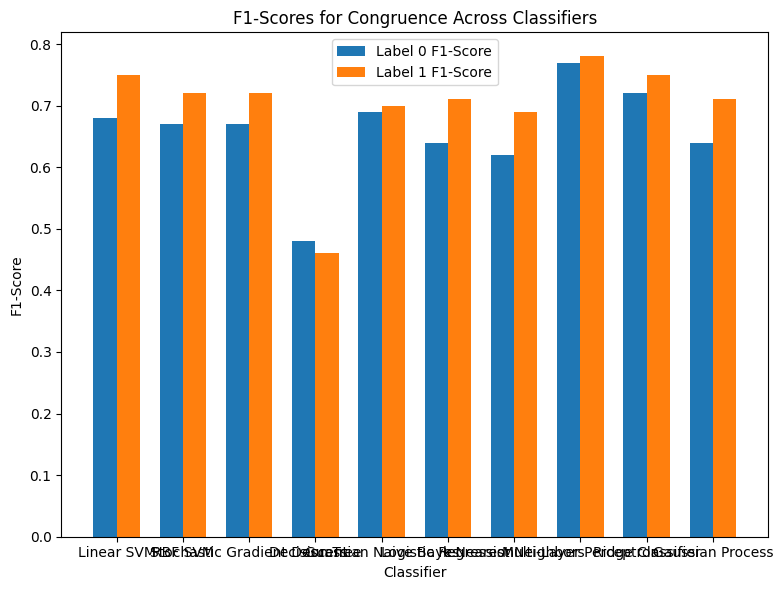

In [29]:
con_reports = []

for classifier in classifiers:
    con_reports.append(classifier.con_report)

# Define a regex pattern to extract the F1-score for labels "0" and "1"
pattern = r"\s+(\d)\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+)"

# Initialize lists to store F1-scores for labels "0" and "1"
f1_scores_label_0 = []
f1_scores_label_1 = []

# Extract F1-scores for each label in each report
for report in con_reports:
    matches = re.findall(pattern, report)
    for match in matches:
        label, f1_score = match
        if label == "0":
            f1_scores_label_0.append(float(f1_score))
        elif label == "1":
            f1_scores_label_1.append(float(f1_score))

# Plotting
n_classifiers = len(con_reports)
index = np.arange(n_classifiers)
bar_width = 0.35

plt.figure(figsize=(8, 6))
bar1 = plt.bar(index - bar_width/2, f1_scores_label_0, bar_width, label='Label 0 F1-Score')
bar2 = plt.bar(index + bar_width/2, f1_scores_label_1, bar_width, label='Label 1 F1-Score')

plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.title('F1-Scores for Congruence Across Classifiers')
plt.xticks(index, [classifiers[i].name for i in range(n_classifiers)])
plt.legend()

plt.tight_layout()
plt.show()


Similar to the previous graph, this graph represents the classifiers' f-1 scores with reference to their congruence predictions. Across all classifiers, congruence was predicted more accurately than incongruence. The Multilayer Perceptron had the highest overall accuracy, and as with the previous data, the Decision Trees had the lowest. 

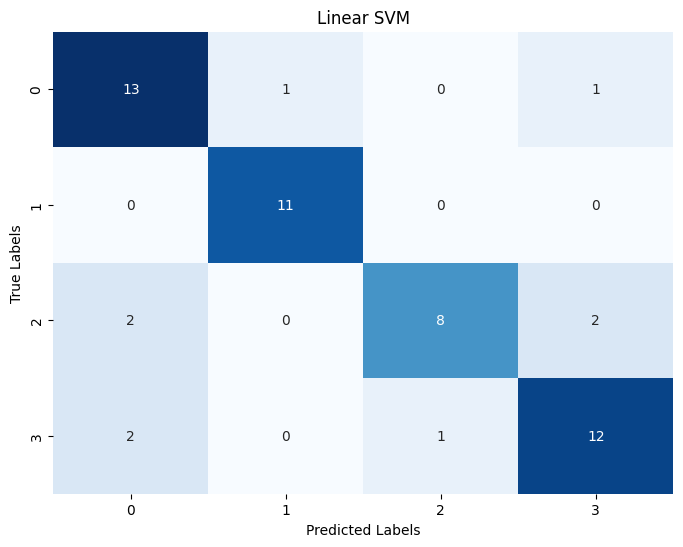

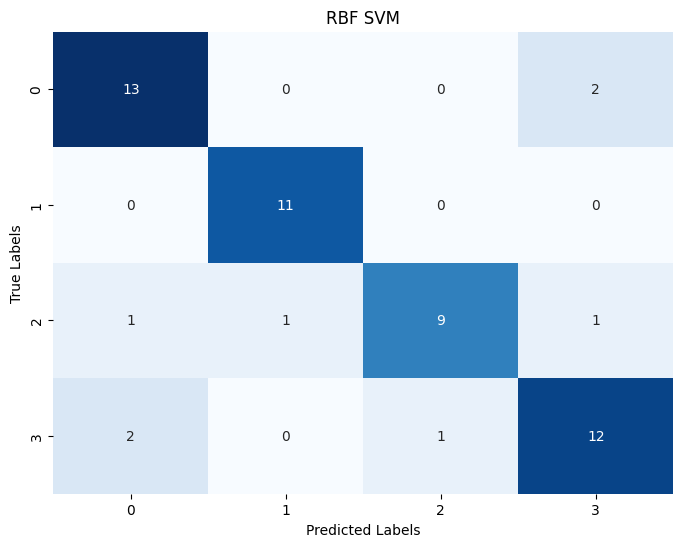

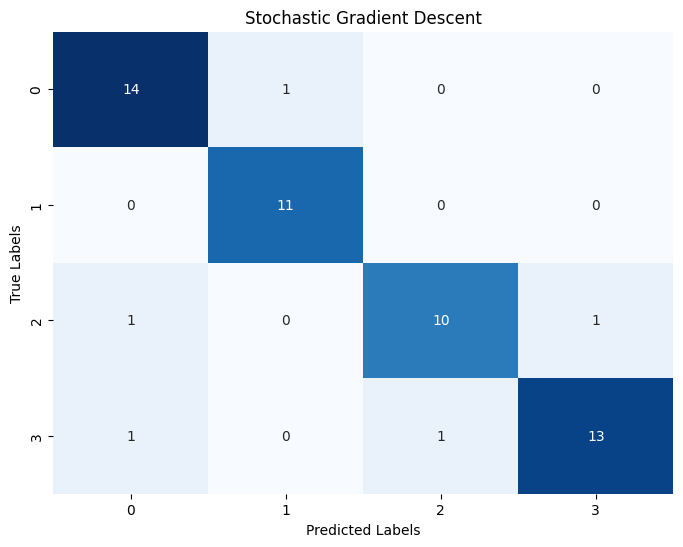

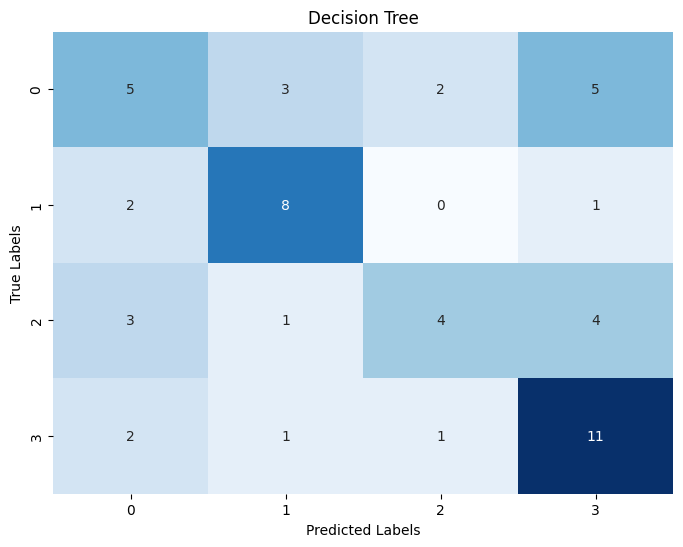

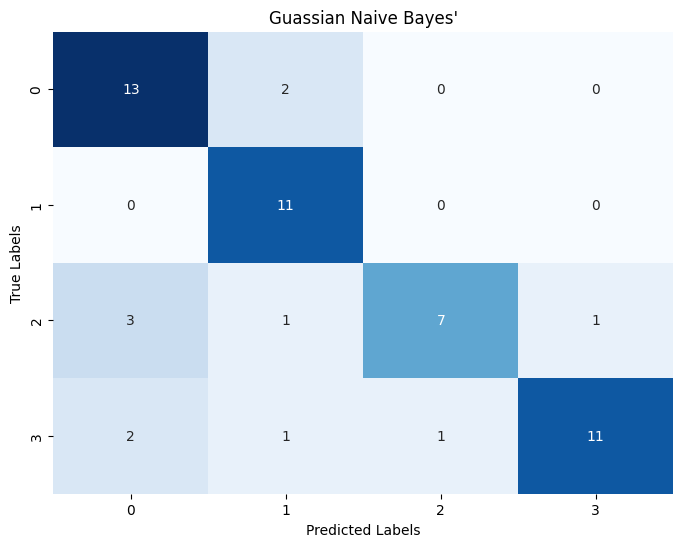

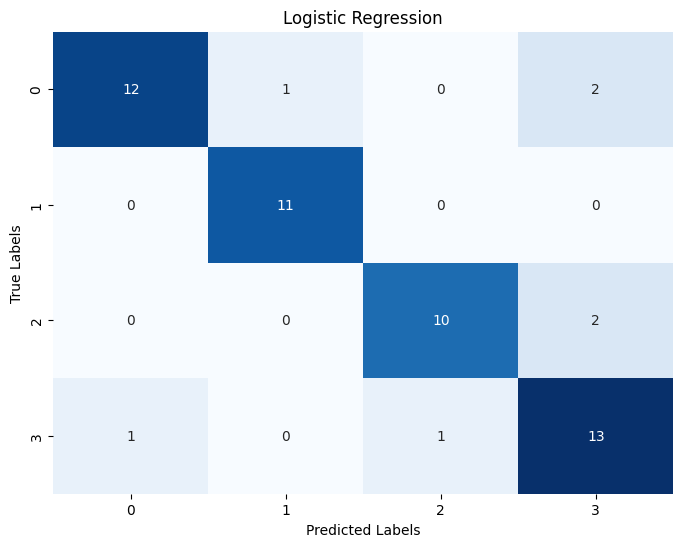

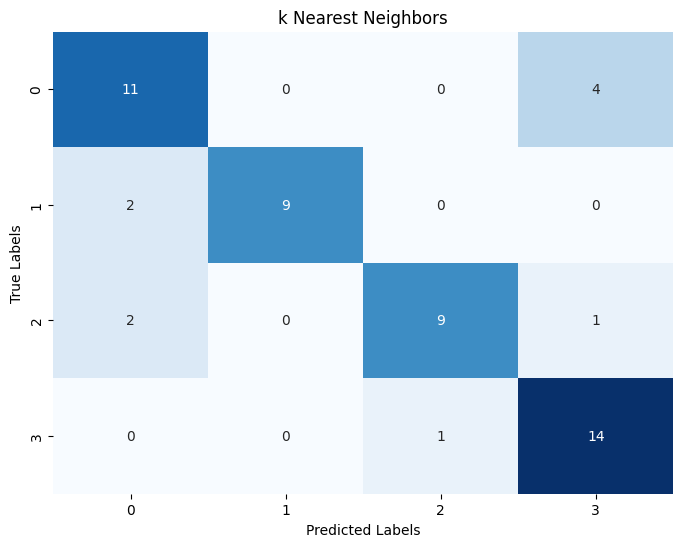

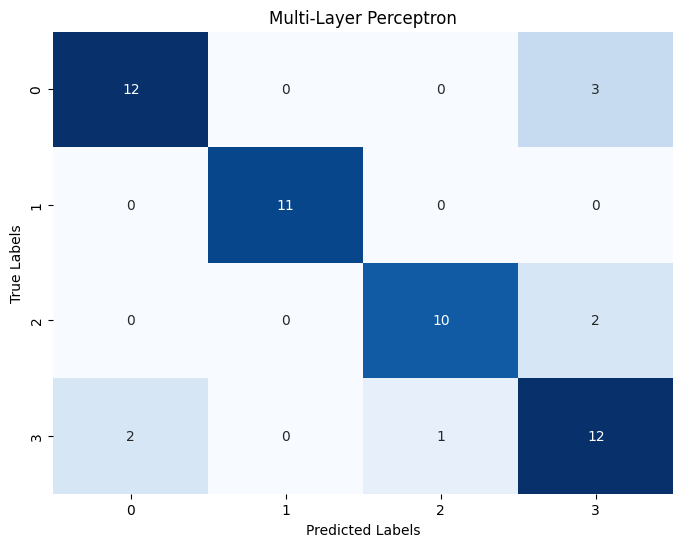

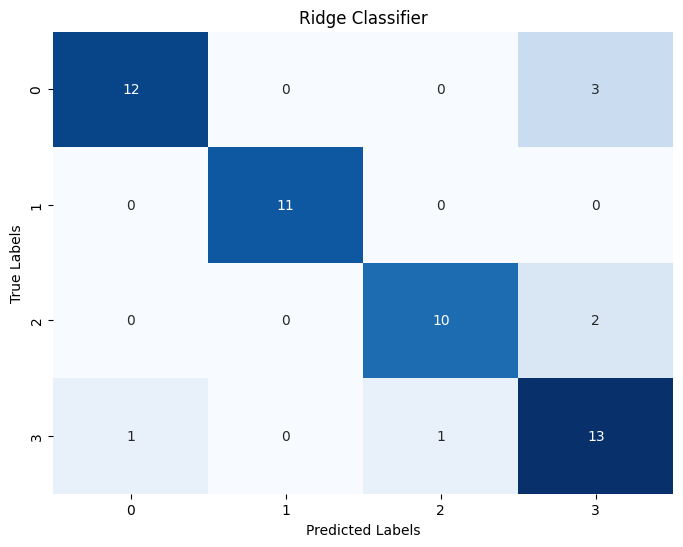

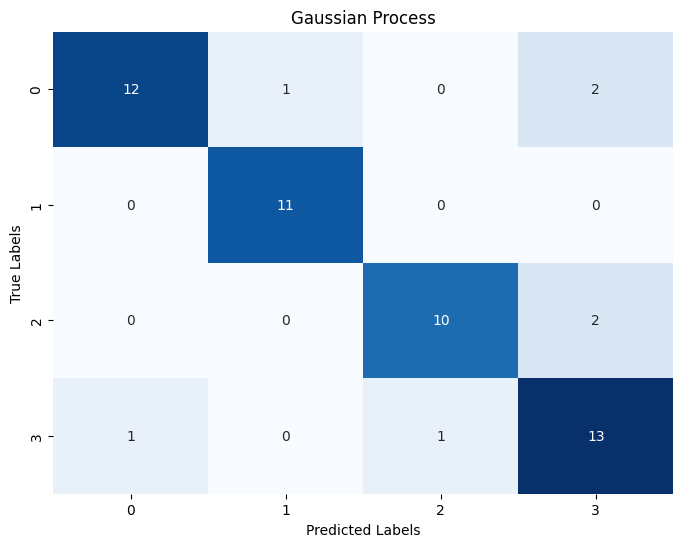

In [22]:
### Confusion Matrix 

for i in range(len(classifiers)):
    conf_matrix = confusion_matrix(test_y_toi, toi_predictions[i])

    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title(classifiers[i].name)
    plt.show()


In [15]:
### Dimensionality Reduction
embeddings = [sentence.embedding for sentence in sentences]
embeddings_array = np.array(embeddings)
covariance_matrix = np.cov(embeddings_array.T)

pca = PCA()
pca.fit(embeddings_array)

explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

n_dimensions_80 = np.argmax(explained_variance_ratio >= 0.8) + 1
n_dimensions_90 = np.argmax(explained_variance_ratio >= 0.9) + 1

print("Number of dimensions to explain 80% of variance:", n_dimensions_80)
print("Number of dimensions to explain 90% of variance:", n_dimensions_90)

Number of dimensions to explain 80% of variance: 48
Number of dimensions to explain 90% of variance: 73


In [20]:
train_r, test_r = train_test_split(sentences, test_size=0.33, random_state=42)

# Convert lists of embeddings to numpy arrays for PCA
train_x_reduced = np.array([x.embedding for x in train])
test_x_reduced = np.array([x.embedding for x in test])
train_y_toi_reduced = [y.toi for y in train]
train_y_con_reduced = [y.con for y in train]
test_y_toi_reduced = [x.toi for x in test]
test_y_con_reduced = [y.con for y in test]

# Apply PCA to find the components that explain 80% and 90% of the variance
def apply_pca(train_data, test_data, variance_threshold):
    pca = PCA(n_components=variance_threshold)
    pca.fit(train_data)
    train_reduced = pca.transform(train_data)
    test_reduced = pca.transform(test_data)
    return train_reduced, test_reduced, pca.n_components_

# For 80% variance
train_x_80, test_x_80, n_components_80 = apply_pca(train_x_reduced, test_x_reduced, 0.8)
print(f"Number of dimensions to explain 80% of variance: {n_components_80}")

# For 90% variance
train_x_90, test_x_90, n_components_90 = apply_pca(train_x_reduced, test_x_reduced, 0.9)
print(f"Number of dimensions to explain 90% of variance: {n_components_90}")


Number of dimensions to explain 80% of variance: 40
Number of dimensions to explain 90% of variance: 58


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
toi_predictions_80 = []
for clf in classifiers:
    clf.model.fit(train_x_80, train_y_toi_reduced)
    predicted_labels = clf.model.predict(test_x_80)
    toi_predictions_80.append(predicted_labels)
    clf.report_80 = classification_report(test_y_toi_reduced, predicted_labels, target_names=["Biographical", "Actions", "Reflection", "Intentions"])

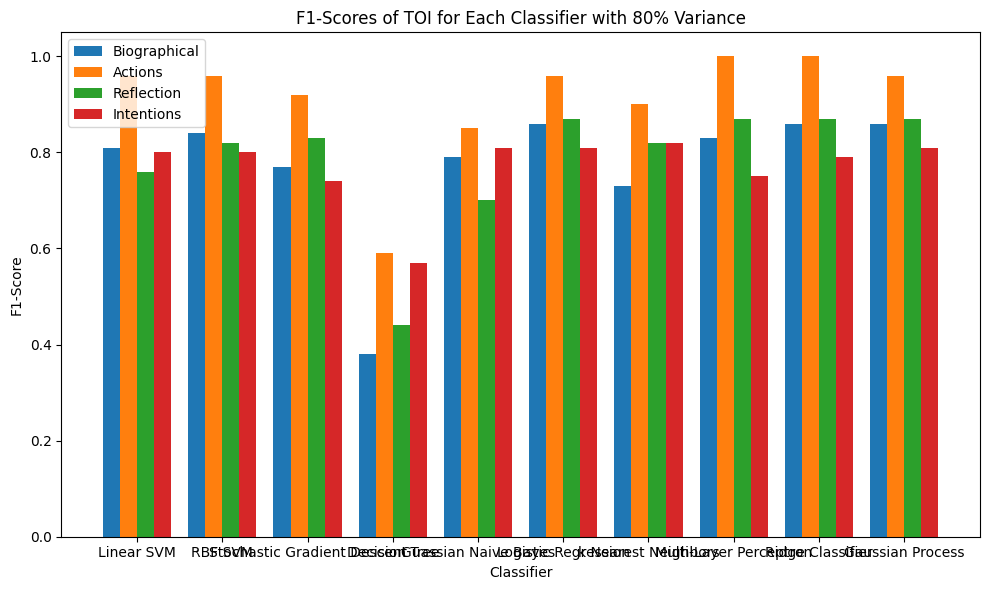

In [33]:
# Simulated list of report strings for two classifiers
toi_reports_80 = []

for classifier in classifiers:
    toi_reports_80.append(classifier.toi_report)

# TOI labels (ensure these match your reports)
toi_labels = ["Biographical", "Actions", "Reflection", "Intentions"]

# Initialize a structure to hold F1-scores for each TOI label for each classifier
f1_scores_reduced = {label: [] for label in toi_labels}

# Extract F1-scores for each TOI label for each classifier
for report in toi_reports_80:
    for label in toi_labels:
        pattern = fr"{label}\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+)"
        match = re.search(pattern, report)
        if match:
            f1_score_reduced = float(match.group(1))
            f1_scores_reduced[label].append(f1_score_reduced)

# Plotting
n_classifiers = len(toi_reports_80)
index = np.arange(n_classifiers)
bar_width = 0.2

plt.figure(figsize=(10, 6))

for i, label in enumerate(toi_labels):
    plt.bar(index + i * bar_width, f1_scores_reduced[label], bar_width, label=label)

plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.title('F1-Scores of TOI for Each Classifier with 80% Variance')
plt.xticks(index + bar_width * (len(toi_labels) - 1) / 2, [classifiers[i].name for i in range(n_classifiers)])
plt.legend()

plt.tight_layout()
plt.show()

In [22]:
con_predictions_80 = []
for clf in classifiers:
    clf.model.fit(train_x_80, train_y_con_reduced)
    predicted_labels = clf.model.predict(test_x_80)
    con_predictions_80.append(predicted_labels)
    clf.con_report_80 = classification_report(test_y_con_reduced, predicted_labels, target_names=["0", "1"])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Comparing the TOI accurancy metrics of the reduced dimsionality to the previous full dimensionality data, there isn't much variation. All classifiers perform similary with both datasets. 

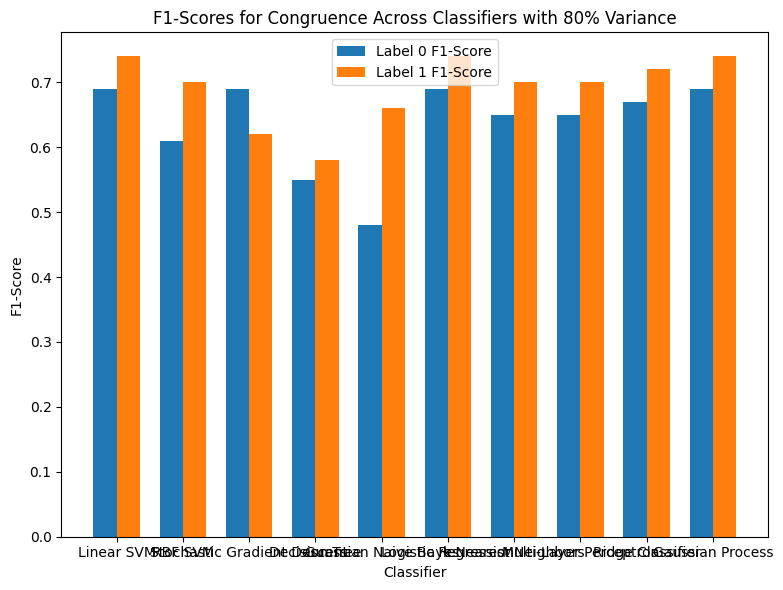

In [32]:
con_reports_80 = []

for classifier in classifiers:
    con_reports_80.append(classifier.con_report_80)

# Define a regex pattern to extract the F1-score for labels "0" and "1"
pattern = r"\s+(\d)\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+)"

# Initialize lists to store F1-scores for labels "0" and "1"
f1_scores_label_0_reduced = []
f1_scores_label_1_reduced = []

# Extract F1-scores for each label in each report
for report in con_reports_80:
    matches = re.findall(pattern, report)
    for match in matches:
        label, f1_score = match
        if label == "0":
            f1_scores_label_0_reduced.append(float(f1_score))
        elif label == "1":
            f1_scores_label_1_reduced.append(float(f1_score))

# Plotting
n_classifiers = len(con_reports_80)
index = np.arange(n_classifiers)
bar_width = 0.35

plt.figure(figsize=(8, 6))
bar1 = plt.bar(index - bar_width/2, f1_scores_label_0_reduced, bar_width, label='Label 0 F1-Score')
bar2 = plt.bar(index + bar_width/2, f1_scores_label_1_reduced, bar_width, label='Label 1 F1-Score')

plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.title('F1-Scores for Congruence Across Classifiers with 80% Variance')
plt.xticks(index, [classifiers[i].name for i in range(n_classifiers)])
plt.legend()

plt.tight_layout()
plt.show()


Unlike TOI, the accuracy metrics for congruence differed in certain classifiers with the reduced dimensionality data. The SGD performed better with incongruent predictions as compared to congruent predictions, while it did the opposite with the original data. Additionally, the overall performance of Decision Trees improved significantly.  

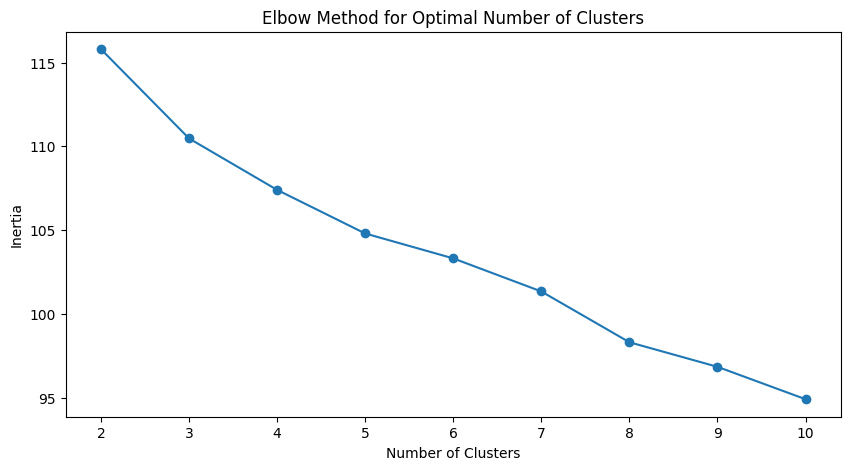

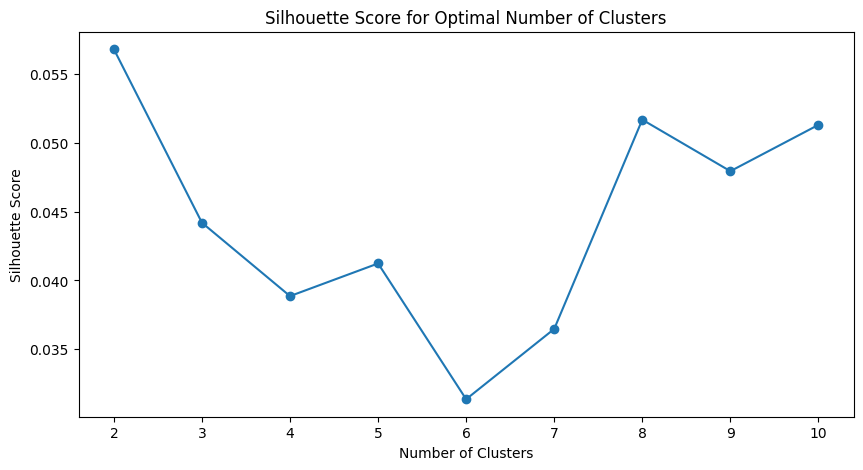

In [35]:
### Clustering 
inertia_values = []
silhouette_scores = []
max_clusters = 10  

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings_array)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(embeddings_array, kmeans.labels_))

# Plotting the elbow curve
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Plotting silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Number of Clusters')
plt.show()


In [52]:
### Optimizing Clustering 
inertia_values = []
silhouette_scores = []
max_clusters = 10  # Maximum number of clusters to consider

for n_clusters in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings_array)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(embeddings_array, kmeans.labels_))

# Find the optimal number of clusters based on the elbow criterion and silhouette score
optimal_n_clusters_elbow = np.argmin(np.diff(inertia_values)) + 2  # Add 2 because of 0-based indexing
optimal_n_clusters_silhouette = np.argmax(silhouette_scores) + 2  # Add 2 because of 0-based indexing

# Choose the optimal number of clusters based on the silhouette score
optimal_n_clusters = optimal_n_clusters_silhouette
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(embeddings_array)

for cluster_id in range(optimal_n_clusters):
    cluster_sentences = [sentences[i] for i, label in enumerate(kmeans.labels_) if label == cluster_id]
    print(f"Cluster {cluster_id + 1}:")
    for sentence in cluster_sentences:
        print(sentence.toi, ', ', sentence.con)
    # Analyze commonalities and labels within each cluster here

Cluster 1:
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  1
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Actions ,  0
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  1
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intentions ,  0
Intention

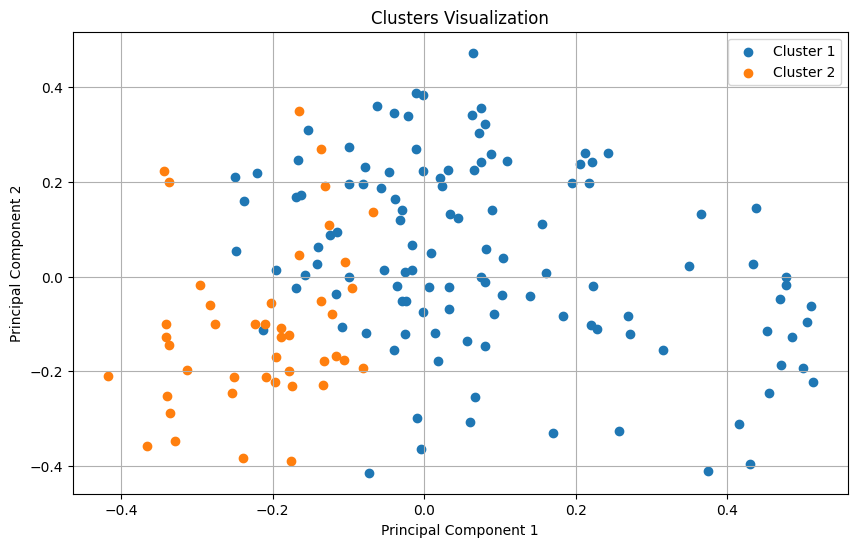

In [53]:
### Visualizing Clusters
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(embeddings_array)

# Reduce dimensionality for visualization (assuming embeddings_array is your data matrix)
pca = PCA(n_components=2)
embeddings_reduced = pca.fit_transform(embeddings_array)

# Plotting the clusters
plt.figure(figsize=(10, 6))
for cluster_id in range(optimal_n_clusters):
    cluster_points = embeddings_reduced[kmeans.labels_ == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id + 1}')

plt.title('Clusters Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
### Splitting Biographical TOI 
train_bio, test_bio = train_test_split(sentences, test_size=0.33, random_state=42)
train_x_bio = [x.embedding for x in train]

for x in train_bio:
    if (x.toi != "Biographical"):
        x.toi = "Other"
for x in test_bio:
    if (x.toi != "Biographical"):
        x.toi = "Other"

train_y_bio = [y.toi for y in train]
test_x_bio = [x.embedding for x in test]
test_y_bio = [x.toi for x in test]

In [26]:
### Biographical TOI Accuracy Metrics
bio_predictions = []
for clf in classifiers:
    clf.model.fit(train_x_bio, train_y_bio)
    predicted_labels_bio = clf.model.predict(test_x_bio)
    bio_predictions.append(predicted_labels_bio)
    clf.bio_report = classification_report(test_y_bio, predicted_labels_bio, target_names=["Biographical", "Other"])

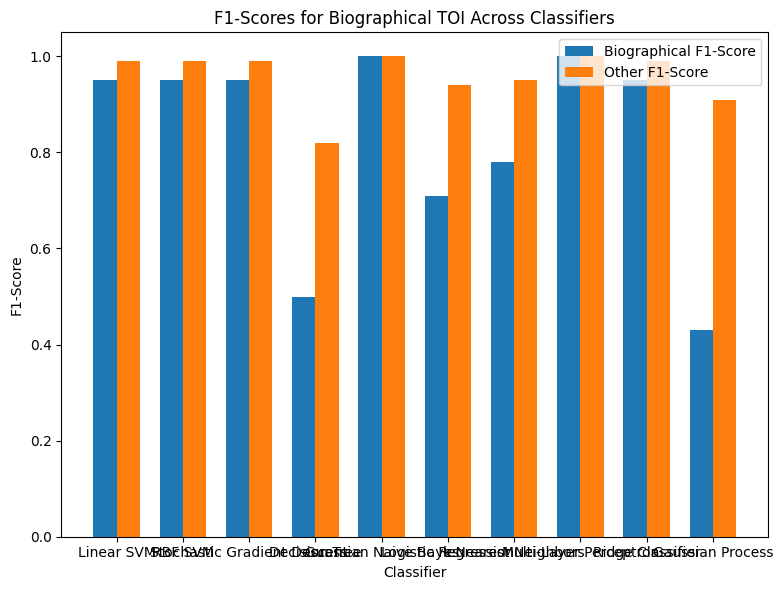

In [115]:
bio_reports = []

for classifier in classifiers:
    bio_reports.append(classifier.bio_report)

# Define a regex pattern to extract the F1-score for "Biographical" and "Other"
pattern = r"(Biographical|Other)\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+)"

# Initialize dictionaries to store F1-scores for "Biographical" and "Other" for each classifier
f1_scores_biographical = []
f1_scores_other = []

# Extract F1-scores for each category in each report
for report in bio_reports:
    matches = re.findall(pattern, report)
    for match in matches:
        category, f1_score = match
        if category == "Biographical":
            f1_scores_biographical.append(float(f1_score))
        elif category == "Other":
            f1_scores_other.append(float(f1_score))

# Plotting
n_classifiers = len(bio_reports)
index = np.arange(n_classifiers)
bar_width = 0.35

plt.figure(figsize=(8, 6))
bar1 = plt.bar(index - bar_width/2, f1_scores_biographical, bar_width, label='Biographical F1-Score')
bar2 = plt.bar(index + bar_width/2, f1_scores_other, bar_width, label='Other F1-Score')

plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.title('F1-Scores for Biographical TOI Across Classifiers')
plt.xticks(index, [classifiers[i].name for i in range(n_classifiers)])
plt.legend()

plt.tight_layout()
plt.show()


Most classifiers did significantly better in predicting the Biographical TOI, some almost reaching a perfect weighted mean accuracy. However, Decision Trees and the Gaussian Process did much worse. 

In [27]:
# Separate sentences into congruent and incongruent lists without removing biographical sentences
con_list = [sentence for sentence in sentences if sentence.con == 1]
incon_list = [sentence for sentence in sentences if sentence.con == 0]

# Perform train-test split for congruent sentences
train_con, test_con = train_test_split(con_list, test_size=0.33, random_state=42)
train_x_con = [x.embedding for x in train_con]
train_y_con = [y.toi for y in train_con]  # Assuming you want to predict congruence here
test_x_con = [x.embedding for x in test_con]
test_y_con = [x.toi for x in test_con]

# Perform train-test split for incongruent sentences
train_incon, test_incon = train_test_split(incon_list, test_size=0.33, random_state=42)
train_x_incon = [x.embedding for x in train_incon]
train_y_incon = [y.con for y in train_incon]  # Assuming congruence


In [28]:
### Split-up Congruence Accuracy Metrics
con_pred = []
for clf in classifiers:
    clf.model.fit(train_x_con, train_y_con)
    predicted_labels = clf.model.predict(test_x_con)
    con_pred.append(predicted_labels)
    clf.conn_report = classification_report(test_y_con, predicted_labels, target_names=["0", "1"])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

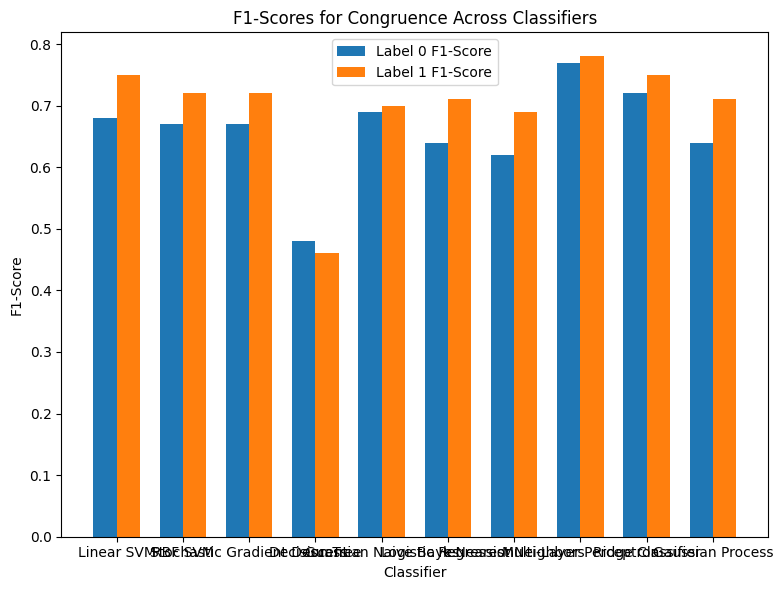

In [30]:
conn_reports = []

for classifier in classifiers:
    conn_reports.append(classifier.conn_report)

# Define a regex pattern to extract the F1-score for labels "0" and "1"
pattern = r"\s+(\d)\s+\d+\.\d+\s+\d+\.\d+\s+(\d+\.\d+)"

# Initialize lists to store F1-scores for labels "0" and "1"
f1_scores_label_0_con = []
f1_scores_label_1_con = []

# Extract F1-scores for each label in each report
for report in conn_reports:
    matches = re.findall(pattern, report)
    for match in matches:
        label, f1_score = match
        if label == "0":
            f1_scores_label_0_con.append(float(f1_score))
        elif label == "1":
            f1_scores_label_1_con.append(float(f1_score))

# Plotting
n_classifiers = len(conn_reports)
index = np.arange(n_classifiers)
bar_width = 0.35

plt.figure(figsize=(8, 6))
bar1 = plt.bar(index - bar_width/2, f1_scores_label_0, bar_width, label='Label 0 F1-Score')
bar2 = plt.bar(index + bar_width/2, f1_scores_label_1, bar_width, label='Label 1 F1-Score')

plt.xlabel('Classifier')
plt.ylabel('F1-Score')
plt.title('F1-Scores for Congruence Across Classifiers')
plt.xticks(index, [classifiers[i].name for i in range(n_classifiers)])
plt.legend()

plt.tight_layout()
plt.show()


As compared to the Biiographical TOI, the classifiers performance did not improve with the seperation of the congruent and incongruent sentences. In fact, there was very little variation in overall performance.  